# **Data Exploration**

link : https://www.kaggle.com/kabure/german-credit-data-with-risk/download

In [8]:
import pandas as pd

data = pd.read_csv('german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
import numpy as np

data.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [10]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [11]:
data['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

Replacement of null values by "No"

In [0]:
data["Saving accounts"] = data["Saving accounts"].replace(np.nan, "No")
data["Checking account"] = data["Checking account"].replace(np.nan, "No")

In [13]:
data.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

# **Preprocessing**

Binarization of the target

In [0]:
data2 = data.copy()

In [0]:
data2.Risk.replace(['bad', 'good'], [1, 0], inplace=True)

List of categorical data 

In [0]:
categorical = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

Encoding of the categorical features

In [17]:
from sklearn.preprocessing import LabelEncoder

for i in categorical :
  encoded_col = LabelEncoder().fit_transform(data2[[i]])
  data2[i] = encoded_col

data2.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,0,1,1169,6,5,0
1,1,22,0,2,1,1,2,5951,48,5,1
2,2,49,1,1,1,1,0,2096,12,3,0
3,3,45,1,2,0,1,1,7882,42,4,0
4,4,53,1,2,0,1,1,4870,24,1,1


Train/test split

In [0]:
X = data2[[i for i in data2.columns if i not in ['Risk', 'Unnamed: 0']]]
y = data2[['Risk']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state = 0)

# **Decsion Tree**

Modelisation

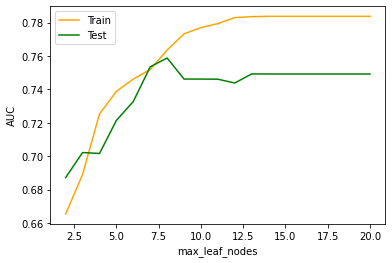


The optimal number of tree 8


In [52]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt

a=2
b=20
test = []
train=[]


for i in range(a,b+1) :
  model = DecisionTreeClassifier(criterion='gini', max_features = 9, max_depth = 4, 
                                 max_leaf_nodes= i, random_state = 0)
  model.fit(xtrain, ytrain)
  fpr, tpr, _ = metrics.roc_curve(np.array(ytest), model.predict_proba(xtest)[:,1])
  auc_test = metrics.auc(fpr,tpr)
  fpr, tpr, _ = metrics.roc_curve(np.array(ytrain), model.predict_proba(xtrain)[:,1])
  auc_train = metrics.auc(fpr,tpr)
  test.append(auc_test)
  train.append(auc_train)




x =[i for i in range(a,b+1)] 

plt.plot(x,train, color="orange",  label='Train') 
plt.plot(x,test, color="green",  label='Test') 



plt.xlabel('max_leaf_nodes')
plt.ylabel('AUC')
plt.legend()


plt.show()

print()
print('The optimal number of tree ' + str(x[test.index(max(test))]))

ROC Curve

In [53]:
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics

model = DecisionTreeClassifier(criterion='gini', max_features = 9, max_depth = 4, 
                                 max_leaf_nodes= 8, random_state = 0)
model.fit(xtrain, ytrain)

y_prob = model.predict_proba(xtest)
fpr, tpr, _ = metrics.roc_curve(np.array(ytest), y_prob[:,1])
auc = metrics.auc(fpr,tpr)

y_prob2 = model.predict_proba(xtrain)
fpr2, tpr2, _ = metrics.roc_curve(np.array(ytrain), y_prob2[:,1])
auc2 = metrics.auc(fpr2,tpr2)



p = figure(title="ROC Curve - Decision Tree (CART)")
p.xaxis.axis_label = 'FPR'
p.yaxis.axis_label = 'TPR'
r2 = p.line(fpr2,tpr2,color='orange',legend = 'Train AUC = '+ str(round(auc2,3)), line_width=2)
r = p.line(fpr,tpr,color='green',legend = 'Test AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
p.legend.location = "top_left"

show(p)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel

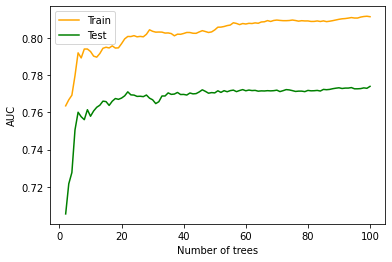


The optimal number of tree 100


In [54]:
from sklearn.ensemble import RandomForestClassifier

a=2
b=100
test = []
train=[]


x = list(np.arange(10,301,10))
for i in range(a,b+1) :
  model = RandomForestClassifier(n_estimators=i, criterion='gini', max_features = 9, 
                                 max_depth = 3, max_leaf_nodes=8, n_jobs =-1, random_state = 0)
  model.fit(xtrain, ytrain)
  fpr, tpr, _ = metrics.roc_curve(np.array(ytest), model.predict_proba(xtest)[:,1])
  auc_test = metrics.auc(fpr,tpr)
  fpr, tpr, _ = metrics.roc_curve(np.array(ytrain), model.predict_proba(xtrain)[:,1])
  auc_train = metrics.auc(fpr,tpr)
  test.append(auc_test)
  train.append(auc_train)


x =[i for i in range(a,b+1)] 

plt.plot(x,train, color="orange",  label='Train') 
plt.plot(x,test, color="green",  label='Test') 



plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.legend()


plt.show()

print()
print('The optimal number of tree ' + str(x[test.index(max(test))]))

ROC Curve

In [57]:
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics

model = RandomForestClassifier(n_estimators=100, criterion='gini', max_features = 9, 
                                 max_depth = 3, max_leaf_nodes=8, n_jobs =-1, random_state = 0)
model.fit(xtrain, ytrain)

y_prob = model.predict_proba(xtest)
fpr, tpr, _ = metrics.roc_curve(np.array(ytest), y_prob[:,1])
auc = metrics.auc(fpr,tpr)

y_prob2 = model.predict_proba(xtrain)
fpr2, tpr2, _ = metrics.roc_curve(np.array(ytrain), y_prob2[:,1])
auc2 = metrics.auc(fpr2,tpr2)



p = figure(title="ROC Curve - Random Forest (CART)")
p.xaxis.axis_label = 'FPR'
p.yaxis.axis_label = 'TPR'
r2 = p.line(fpr2,tpr2,color='orange',legend = 'Train AUC = '+ str(round(auc2,3)), line_width=2)
r = p.line(fpr,tpr,color='green',legend = 'Test AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
p.legend.location = "top_left"

show(p)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


# **Get Probability for Random Forest**

Probanility for the test sample

In [58]:
proba = xtest.copy()
proba['Risk'] = ytest['Risk']
proba['Probability'] = model.predict_proba(xtest)[:,1]
proba

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Probability
993,30,1,3,1,1,1,3959,36,4,0,0.523077
859,26,1,2,2,2,0,3577,9,1,0,0.109530
298,43,1,2,1,1,0,2515,18,4,0,0.088468
553,27,1,2,1,2,2,1995,12,1,0,0.349344
672,42,1,3,1,1,0,10366,60,1,0,0.246567
...,...,...,...,...,...,...,...,...,...,...,...
167,20,0,2,1,4,2,1577,11,4,0,0.336615
998,23,1,2,0,1,1,1845,45,5,1,0.613923
984,30,1,1,1,1,0,2028,24,4,0,0.088189
491,42,0,3,0,1,2,8318,27,0,1,0.442451
